<center style="font-size:30px;padding-bottom:10px;color:DarkBlue;">Gestión de Datos</center>
<center> _____________________________________________________________________________________________ </center>
<p>&nbsp;</p>
<center style="font-size:25px;padding-bottom:10px;color:CornFlowerBlue;">Práctica 4</center>
<center style="font-size:20px;padding-bottom:10px;color:LightCoral;">Ejercicio sobre Analítica y Visualización de Datos con Power BI </center>
<center style="font-size:15px;">María Barroso Honrubia</center>
<center style="font-size:15px;">Gloria del Valle Cano</center>
<center style="font-size:12px;">17 de diciembre 2021</center>


In [2]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
from IPython.display import Image

In [2]:
# Observamos los datos descargados
df = pd.read_csv('data/casos_diagnostico_ccaa.csv')
df.head()

,ccaa_iso,fecha,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_ag,num_casos_prueba_elisa,num_casos_prueba_desconocida
0,AN,2020-01-01,0,0,0,0,0,0
1,AR,2020-01-01,0,0,0,0,0,0
2,AS,2020-01-01,0,0,0,0,0,0
3,CB,2020-01-01,0,0,0,0,0,0
4,CE,2020-01-01,1,0,0,1,0,0


In [3]:
# Vemos la información de la primera columna
isos = sorted(list(set(list(df.ccaa_iso))))
isos

['AN',
 'AR',
 'AS',
 'CB',
 'CE',
 'CL',
 'CM',
 'CN',
 'CT',
 'EX',
 'GA',
 'IB',
 'MC',
 'MD',
 'ML',
 'NC',
 'PV',
 'RI',
 'VC']

In [4]:
# Buscamos la ISO oficial asociada a la comunidad autónoma
r = requests.get("https://es.wikipedia.org/wiki/ISO_3166-2:ES#cite_note-newsletter-1")
soup = BeautifulSoup(r.text, 'html.parser')

# Encontramos la primera tabla de Wikipedia
table = soup.find_all('table')[0]

# Obtenemos las filas en HTML
rows = table.findAll(lambda tag: tag.name=='tr')

# Obtenemos el contenido de la tabla
ccaa = [list(filter(lambda item: item, rows[iso].text.strip().split('\n'))) for iso, _ in enumerate(rows)][1:]

# Limpiamos los strings de la ISO y de los nombres
new_isos = [i.split('ES-')[1] for i in [ccaa[i][0].split(',')[0].split('(')[0].split('/')[0].strip() for i in range(len(ccaa[1:]))]]
nombres = [ccaa[i][1].split(',')[0].split('(')[0].split('/')[0].strip() for i in range(len(ccaa[1:]))]

# Guardamos en un diccionario los nombres con su correspondiente ISO
dicc = {k:v for k,v in zip(new_isos, sorted(nombres))}

In [5]:
# Vemos que faltan 3 datos
set(isos) - set(new_isos)

{'CE', 'ML', 'VC'}

In [6]:
# Los añadimos a mano
dicc['VC'] = 'Comunidad Valenciana'
dicc['CE'] = 'Ceuta'
dicc['ML'] = 'Melilla'

# Cambiamos otros
dicc['IB'] = 'Islas Baleares'
dicc['CN'] = 'Islas Canarias'
dicc['CT'] = 'Cataluña'
dicc['MD'] = 'Comunidad de Madrid'
dicc['CL'] = 'Castilla La Mancha'
dicc['MC'] = 'Región de Murcia'
dicc

{'AN': 'Andalucía',
 'AR': 'Aragón',
 'AS': 'Asturias',
 'CN': 'Islas Canarias',
 'CB': 'Cantabria',
 'CM': 'Castilla y León',
 'CL': 'Castilla La Mancha',
 'CT': 'Cataluña',
 'EX': 'Extremadura',
 'GA': 'Galicia',
 'IB': 'Islas Baleares',
 'RI': 'La Rioja',
 'MD': 'Comunidad de Madrid',
 'MC': 'Región de Murcia',
 'NC': 'Navarra',
 'PV': 'País Vasco',
 'VC': 'Comunidad Valenciana',
 'CE': 'Ceuta',
 'ML': 'Melilla'}

In [7]:
# Cambiamos el identificador de la comunidad autónoma
df.ccaa_iso = df.ccaa_iso.map(dicc)

# Cambiamos el nombre de las columnas del csv
df.columns = ['Comunidad Autonoma', 
              'Fecha', 
              'Casos confirmados', 
              'Casos con test PCR', 
              'Casos con anticuerpos',
              'Casos con test antigenos',
              'Casos con test Elisa',
              'Casos con otra prueba']

In [8]:
# Vemos como ha quedado
df.head()

,Comunidad Autonoma,Fecha,Casos confirmados,Casos con test PCR,Casos con anticuerpos,Casos con test antigenos,Casos con test Elisa,Casos con otra prueba
0,Andalucía,2020-01-01,0,0,0,0,0,0
1,Aragón,2020-01-01,0,0,0,0,0,0
2,Asturias,2020-01-01,0,0,0,0,0,0
3,Cantabria,2020-01-01,0,0,0,0,0,0
4,Ceuta,2020-01-01,1,0,0,1,0,0


In [9]:
# Revisamos que no hay duplicados
df.duplicated().any()

False

In [10]:
# Revisamos que no hayan valores NaN
df.isna().any()

Comunidad Autonoma          False
Fecha                       False
Casos confirmados           False
Casos con test PCR          False
Casos con anticuerpos       False
Casos con test antigenos    False
Casos con test Elisa        False
Casos con otra prueba       False
dtype: bool

In [11]:
# Guardamos el nuevo dataset
df.to_csv('data/covid_processed_data.csv', index=False)

In [12]:
# Tambien en formato excel
df.to_excel('data/covid_processed_data.xlsx', engine='xlsxwriter')

In [13]:
# Añadimos geolocalización para el mapa coroplético
# https://gist.github.com/brauliodiez/d0cc1ddae9cba6a6c973963db1e97574
df_loc = pd.read_json('communities.json')
df_loc.head()

,name,long,lat
0,Andalucía,-4.50000,37.60000
1,Aragón,-1.00000,41.00000
2,Asturias,-5.86112,43.36662
3,Islas Canarias,-15.50000,28.00000
4,Cantabria,-4.03333,43.20000


In [14]:
# Ponemos nombres de columnas legibles
df_loc.columns = ['Comunidad Autonoma', 'Longitud', 'Latitud']

In [15]:
# Guardamos en excel
df_loc.to_excel('data/communities_geoloc.xlsx', engine='xlsxwriter')

In [16]:
# Lo juntamos en uno por si fuera necesario en Power BI
df_final = df.merge(df_loc, how='inner', on='Comunidad Autonoma')
df_final.to_excel('data/all_covid_data.xlsx', engine='xlsxwriter')

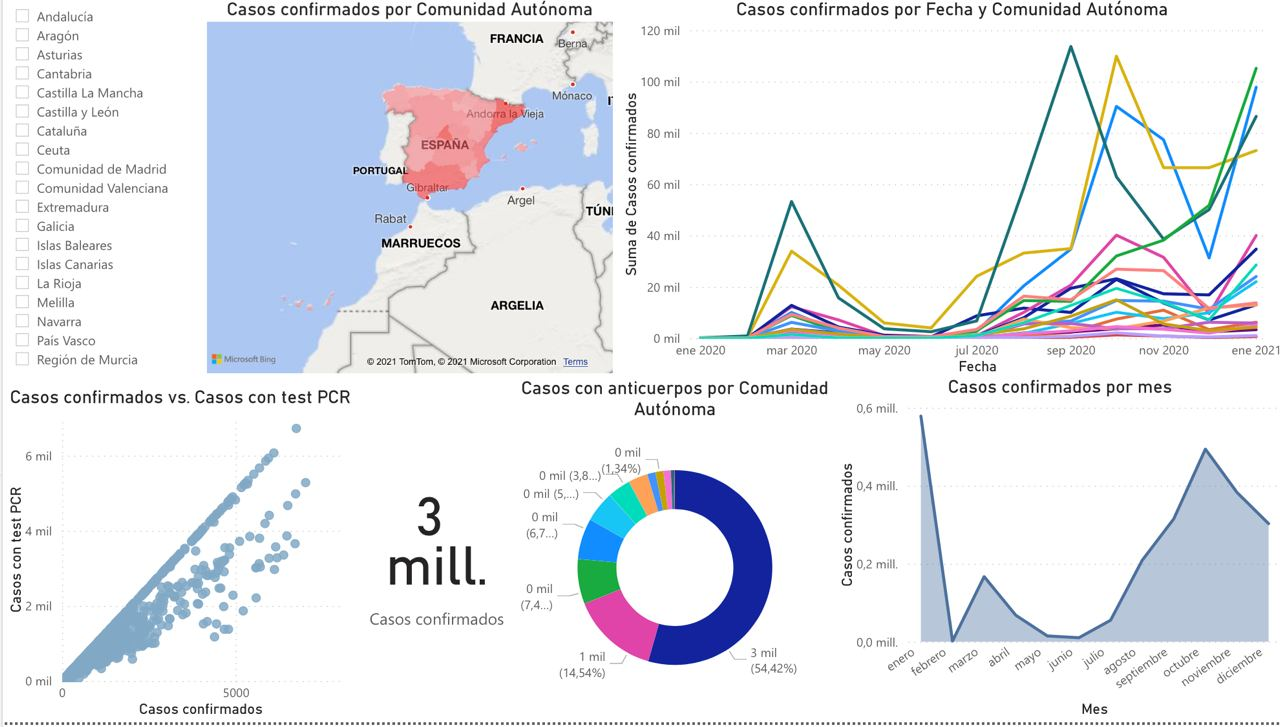

In [3]:
# Se adjunta el informe como PowerPoint y PDF, pero se incluye una captura del mismo
Image('informe_covid.jpeg')